#                    **Water Quality Prediction**

**Importing Required Libraries**



In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.linear_model           import LinearRegression
from sklearn.naive_bayes            import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor,BaggingRegressor,AdaBoostRegressor

**Reading the dataset and displaying 5 random elements**

In [3]:
df = pd.read_csv("/content/drive/My Drive/Personal Research on Water Quality/india_water_edit.csv")
display(df.head(5))

STATION CODE                                          LOCATIONS  \
0        1393.0               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1        1399.0  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2        1475.0                                ZUARI AT PANCHAWADI   
3        3181.0                        RIVER ZUARI AT BORIM BRIDGE   
4        3182.0                       RIVER ZUARI AT MARCAIM JETTY   

         STATE  Temp   DO   PH  CONDUCTIVITY  BOD  NITRATE  F_COLIFORM  \
0  DAMAN & DIU  30.6  6.7  7.5         203.0  NaN      0.1        11.0   
1          GOA  29.8  5.7  7.2         189.0  2.0      0.2      4953.0   
2          GOA  29.5  6.3  6.9         179.0  1.7      0.1      3243.0   
3          GOA  29.7  5.8  6.9          64.0  3.8      0.5      5382.0   
4          GOA  29.5  5.8  7.3          83.0  1.9      0.4      3428.0   

   T_COLIFORM  year  
0        27.0  2014  
1      8391.0  2014  
2      5330.0  2014  
3      8443.0  2014  
4      5500.0  2014

**Dataset Cleaning**

In [4]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.to_csv(r'/content/drive/My Drive/Personal Research on Water Quality/india_water_2.csv', index = False)
display(df.head(5))

STATION CODE                                          LOCATIONS STATE  \
1        1399.0  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   GOA   
2        1475.0                                ZUARI AT PANCHAWADI   GOA   
3        3181.0                        RIVER ZUARI AT BORIM BRIDGE   GOA   
4        3182.0                       RIVER ZUARI AT MARCAIM JETTY   GOA   
5        1400.0             MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA   GOA   

   Temp   DO   PH  CONDUCTIVITY  BOD  NITRATE  F_COLIFORM  T_COLIFORM  year  
1  29.8  5.7  7.2         189.0  2.0      0.2      4953.0      8391.0  2014  
2  29.5  6.3  6.9         179.0  1.7      0.1      3243.0      5330.0  2014  
3  29.7  5.8  6.9          64.0  3.8      0.5      5382.0      8443.0  2014  
4  29.5  5.8  7.3          83.0  1.9      0.4      3428.0      5500.0  2014  
5  30.0  5.5  7.4          81.0  1.5      0.1      2853.0      4049.0  2014

In [5]:
df = df.drop(["STATION CODE", "LOCATIONS", "STATE"], axis=1)
#axis  means drop by column

In [6]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['DO']=pd.to_numeric(df['DO'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['BOD']=pd.to_numeric(df['BOD'],errors='coerce')
df['CONDUCTIVITY']=pd.to_numeric(df['CONDUCTIVITY'],errors='coerce')
df['NITRATE']=pd.to_numeric(df['NITRATE'],errors='coerce')
df['T_COLIFORM']=pd.to_numeric(df['T_COLIFORM'],errors='coerce')
df['F_COLIFORM']=pd.to_numeric(df['F_COLIFORM'],errors='coerce')
df.dtypes

Temp            float64
DO              float64
PH              float64
CONDUCTIVITY    float64
BOD             float64
NITRATE         float64
F_COLIFORM      float64
T_COLIFORM      float64
year              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 1 to 1216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          879 non-null    float64
 1   DO            879 non-null    float64
 2   PH            879 non-null    float64
 3   CONDUCTIVITY  879 non-null    float64
 4   BOD           879 non-null    float64
 5   NITRATE       879 non-null    float64
 6   F_COLIFORM    879 non-null    float64
 7   T_COLIFORM    879 non-null    float64
 8   year          879 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 68.7 KB


In [8]:
features = df.drop(["DO"], axis=1).columns

In [9]:
df_train, df_test = train_test_split(df, test_size=0.25)

**Checking for null values in the dataset**

In [ ]:
np.isnan(df['Temp']).any()

False

In [ ]:
np.isnan(df['PH']).any()

False

In [ ]:
np.isnan(df['CONDUCTIVITY']).any()


False

In [ ]:
np.isnan(df['BOD']).any()

False

In [ ]:
np.isnan(df['NITRATE']).any()

False

In [ ]:
np.isnan(df['F_COLIFORM']).any()

False

In [ ]:
np.isnan(df['T_COLIFORM']).any()

False

In [ ]:
np.isnan(df['year']).any()

False

 ### Higher R-squared values represent smaller differences between the observed data and the fitted values. Usually, the larger the R2, the better the regression model fits your observations. 

**Applying Linear regression & Visualising**

R squred score:  0.2967301294338157


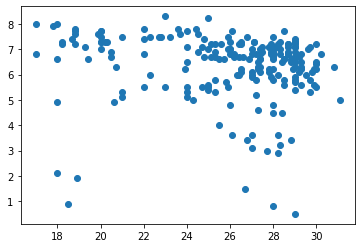

In [11]:
clf = LinearRegression()
clf.fit(df_train[features], df_train["DO"])
score = clf.score(df_test[features], df_test["DO"])
print("R squred score: ", score)
y_pred=clf.predict(df_test[features])
plt.scatter(df_test[features]["Temp"],df_test["DO"])

**Trying Different Models**

In [12]:
clf = GradientBoostingRegressor()
clf.fit(df_train[features], df_train["DO"])
score = clf.score(df_test[features], df_test["DO"])
print("R squred score: ", score)

R squred score:  0.6423968613396852


In [13]:
clf = AdaBoostRegressor()
score=clf.fit(df_train[features], df_train["DO"]).score(df_test[features], df_test["DO"])
print("R squred score: ", score)

R squred score:  0.5367731334989061


In [14]:
clf = BaggingRegressor(n_estimators = 1000, random_state = 55)
score=clf.fit(df_train[features], df_train["DO"]).score(df_test[features], df_test["DO"])
print("R squred score: ", score)

R squred score:  0.6025074775012991


In [15]:
clf = RandomForestRegressor(n_estimators = 50, random_state = 55,max_depth=20)
score=clf.fit(df_train[features], df_train["DO"]).score(df_test[features], df_test["DO"])
print("R squred score: ", score)

R squred score:  0.5825978095460168


**Best regressor for dataset - ExtraTreesRegressor**

In [16]:
clf = ExtraTreesRegressor(n_estimators = 50, random_state = 55,max_depth=45)
score=clf.fit(df_train[features], df_train["DO"]).score(df_test[features], df_test["DO"])
print("R squred score: ", score)

R squred score:  0.6498129991785955


In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydot
tree = clf.estimators_[5]

In [18]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)

In [19]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# **VISUALIZATION**

Extra Tree Regressor with max depth 45

In [20]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png')

Extra Tree Regressor with max depth 3

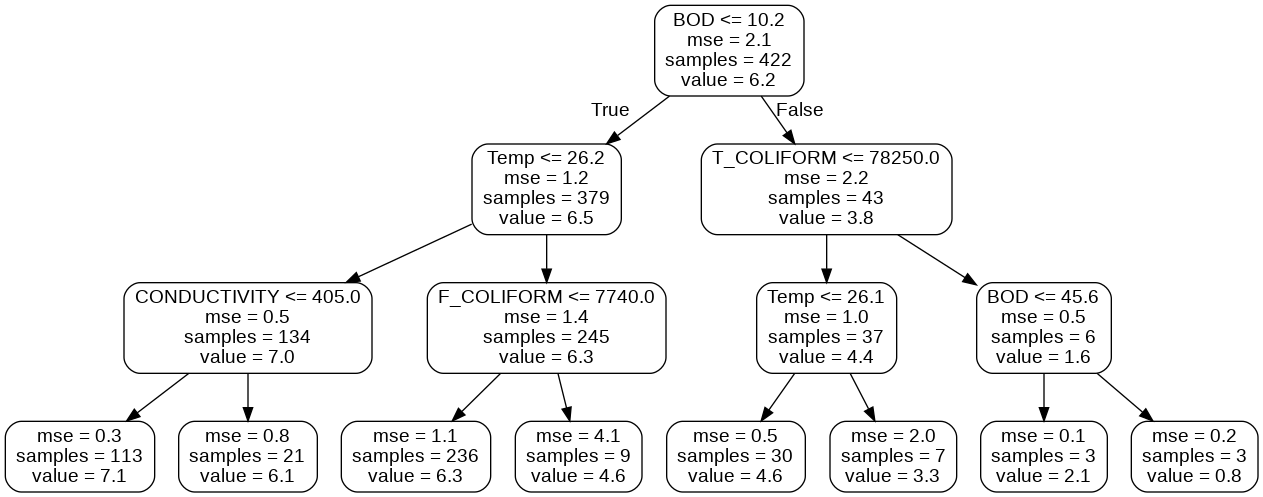

In [ ]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png')